## Juego Cara-Sello
### UNIVERSIDA NACIONAL DE LOJA
#### Por : israel Leon
#### Curso : 6to A 

In [2]:
# Para nuestro ejemplo 0= Cara y 1 = Sello
#JUAN = ELIGE CARA Y PEDRO = ELIGE SELLO siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# contantes 
poblacion_50=50
poblacion_100=100
poblacion_150=150

In [4]:

#Eleccion de tres tiros de forma aletoria uniforme
#p es un arreglo de tamaño 2 que representa la probabilidad de que salga 0,1
#retorna un arreglo de los 3 tiros

def samples(p):
    return np.random.choice(2,3,p=p)

In [5]:

# tiros == es un np_array de los tres tiros muestra
# devuelve el signo gaandor , se gana con 2 de 3  
def gana(tiros):
    if (np.sum(tiros==0))>=2:
        return 0
    else:
        return 1

In [6]:
# data con repeticiones del juego entero
# n es la poblacion o el numero de repeticiones
def numero_juegos(n,p=[0.5,0.5]):
    data=[]
    for i in range(n):
        sample = samples(p)
        ganador= gana(sample)
        example=np.append(sample,ganador)
        data.append(example)
    
    return pd.DataFrame(data=data,
                       columns=["tratado1","tratado2","tratado3","gana"])

In [7]:
#cuenta las veces que salio cara y sello por cada tratamiento
def contar(poblacion,df):
    sello_t1= df["tratado1"].sum()
    sello_t2= df["tratado2"].sum()
    sello_t3= df["tratado3"].sum()
    data=[[sello_t1,sello_t2,sello_t3],
          [poblacion-sello_t1,poblacion-sello_t2,poblacion-sello_t3]
         ]
    return pd.DataFrame(data=data,
                        columns=["tratado1","tratado2","tratado3"],
                        index=["sello","cara"])

## Generacion de datos 

In [15]:
#data frame uniformes
datos_uni50 = numero_juegos(poblacion_50)
datos_uni100=numero_juegos(poblacion_100)
datos_uni150=numero_juegos(poblacion_150)


#data frame con probabilidad 70-30
probabilidad=[0.7,0.3] # 70%porciento a cara, 30% a sello
datos50 = numero_juegos(poblacion_50,probabilidad)
datos100=numero_juegos(poblacion_100,probabilidad)
datos150=numero_juegos(poblacion_150,probabilidad)



## graficación de comparativa

In [16]:
# Grafica que relaciona los resulatdos de los ganadores obtenidos
# en distintas muestras 
# df= arreglo de data frames a comparar
# name= el nombre con el que se guarda la exportacion de la imagen resultante
def graficar_ganadores(df_ar,name="Resultados"):
    caras=[]
    sellos=[]
    for df in df_ar:
        caras.append(len(df)-df["gana"].sum())
        sellos.append(df["gana"].sum())
    
    data={"Jorge(cara)":caras,"Pedro(sello)":sellos}
    datos=pd.DataFrame(data=data,index=["50","100","150"])
    datos.plot(kind='bar',stacked=False,title="Ganadores")
    
    plt.savefig(name+".png")
    plt.show()

    return datos






## Resultados con probabilidad 50-50



Resultado de los tratados con poblacion 50 y distribución uniforme(50-50)

In [17]:
contar(poblacion_50,datos_uni50)

,tratado1,tratado2,tratado3
sello,31,29,29
cara,19,21,21


Resultados con los tratados con poblacion 100 y distribución uniforme(50-50)

In [18]:
contar(poblacion_100,datos_uni100)

,tratado1,tratado2,tratado3
sello,48,53,50
cara,52,47,50


Resultados con los tratados con poblacion 150 y distribución uniforme(50-50)

In [19]:
contar(poblacion_150,datos_uni150)

,tratado1,tratado2,tratado3
sello,80,70,76
cara,70,80,74


Resultados de gráficas de ploteo de ganadores 

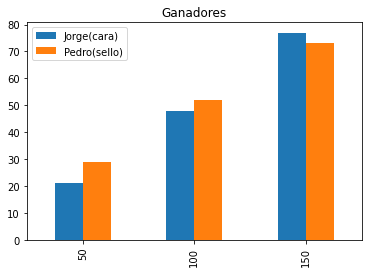

,Jorge(cara),Pedro(sello)
50,21,29
100,48,52
150,77,73


In [20]:
gandores50=graficar_ganadores([datos_uni50,datos_uni100,datos_uni150],"Ganadores uniforme")
gandores50

## Resultados con probabilidad 70-30



Resultado de los tratados con poblacion 50 y distribución uniforme(70-30)

In [21]:
contar(poblacion_50,datos50)

,tratado1,tratado2,tratado3
sello,13,19,10
cara,37,31,40


Resultado de los tratados con poblacion 100 y distribución uniforme(70-30)

In [22]:
contar(poblacion_100,datos100)

,tratado1,tratado2,tratado3
sello,28,30,26
cara,72,70,74


Resultado de los tratados con poblacion 150 y distribución uniforme(70-30)

In [23]:
contar(poblacion_150,datos150)

,tratado1,tratado2,tratado3
sello,42,49,48
cara,108,101,102


resultado de comparativa de los gráficos de ganadores

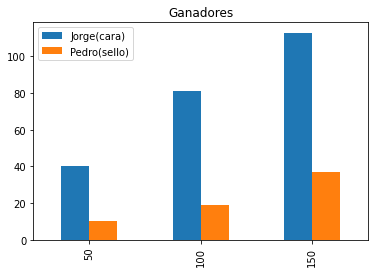

,Jorge(cara),Pedro(sello)
50,40,10
100,81,19
150,113,37


In [24]:
gandores70=graficar_ganadores([datos50,datos100,datos150],"Ganadores no uniforme")
gandores70